In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import random

import os
import sys
sys.path.append('../src')

from math_utils import *
from model import *
from utils import *

SEED = 42
np.random.seed(SEED)
random.seed(SEED)

# QR

## Complexity Analysis

Show that our implementation scale linearly in "m"

Text(0, 0.5, 'Time (s)')

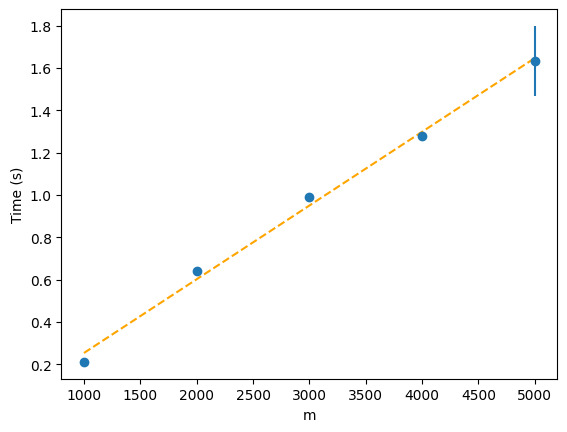

In [ ]:
plot_time_mean_variance(n=256, trials=5, START=1000, END=10001, STEP=1000)

In [ ]:
plot_time_mean_variance(n=512, trials=5, START=1000, END=10001, STEP=1000)

## Accuracy Analysis

Show that our implementatio holds the theoretical accuracy/stability analysis. We use an "a posteriori" test exploiting the residual:

$\frac{||X - QR||}{||X||}$

### Uniform X

In [ ]:
a, b = -1, 1
num_matrices = 100
END = 5000
MAX_N = 256

n_values = [random.randint(1, MAX_N) for _ in range(num_matrices)]
dimensions = [(random.randint(n + 1, END), n) for n in n_values]
matrices = [np.random.uniform(a, b, size=(m, n)) for m, n in dimensions]

residuals = []

for matrix in matrices:
    residuals.append(residual_QR(matrix))

print(np.mean(residuals), np.var(residuals))


1.238093012796979e-15 1.2480554174195298e-31


### Normal X

In [ ]:
loc, scale = 0, 1

n_values = [random.randint(1, MAX_N) for _ in range(num_matrices)]
dimensions = [(random.randint(n + 1, END), n) for n in n_values]
matrices = [np.random.normal(loc, scale, size=(m, n)) for m, n in dimensions]

residuals = []

for matrix in matrices:
    residuals.append(residual_QR(matrix))

print(np.mean(residuals), np.var(residuals))

1.3104686962825916e-15 9.597155048628782e-32


# Least-Square Problem (m $\geq$ n)

## Complexity Analysis

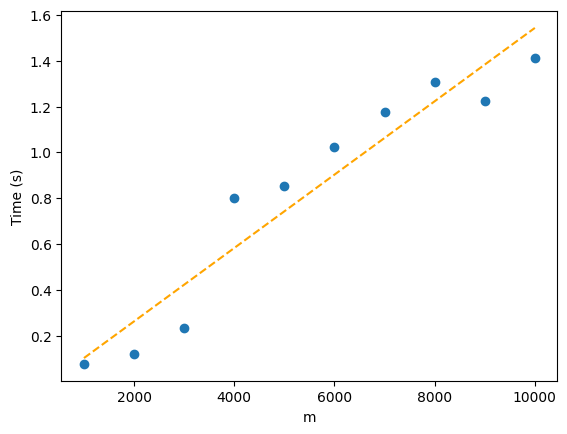

In [ ]:
hidden_size = 128
input_size = 10
a, b = -1, 1
START=1000
END=10001
STEP=1000
num_trials = 1

mean_and_variance = []

for num_samples in range(START, END, STEP):
    times = []
    for _ in range(num_trials):
        D = np.random.uniform(a, b, size=(num_samples, input_size)) # dataset
        Y = np.sin(D)

        model = ELM(input_size, hidden_size)
        start = time.time()
        model.fit(D, Y)
        end = time.time()
        times.append(end - start)
    mean_and_variance.append((np.mean(times), np.var(times)))

plot_errorbar(START, END, STEP, mean_and_variance)


## Accuracy Analysis

# Least-Square Problem (m < n)

## Complexity Analysis

## Accuracy Analysis